## **Spatio-Temporal Beam-Level Traffic Forecasting Challenge by ITU**
The objective of this challenge is to develop a multivariate time series forecasting model for traffic volume (DLThpVol) at the beam level.
* 2880 beams across 30 base stations
* each base station consists of 3 cells with 32 beams , with data recorded hourly
* dataset encompasses a five week period with data recorded at hourly intervals

* datasets:
    * traffic_DLThpVol.csv: represents throughput volume.
    * traffic_DLThpTime.csv: represents throughput time.
    * traffic_ DLPRB.csv: represents Physical Resource Block (PRB) utilization.
    * traffic_MR_number.csv: represents user count.

### **Notebook Objective**
* Turn the large csvs into memory efficient parquet files and preparing data in the correct format

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

* Here you just need to change the input path with the data from zindi
* Create an output path for saving the datasets you are going to prepare and this is what we will use in subsequent notebooks

In [ ]:
input_path = '/content/gdrive/MyDrive/spatio_temporal/'
os.makedirs(os.path.join(input_path, 'prepared_data'), exist_ok = True)
output_path = '/content/gdrive/MyDrive/spatio_temporal/prepared_data/'

sub = pd.read_csv(input_path + "SampleSubmission.csv")


In [ ]:
sub['week'] = sub['ID'].apply(lambda x: x.split('_')[-5].replace("w","").split("-")[1])
sub['hr'] = sub['ID'].apply(lambda x: x.split('_')[-4])
sub['base_station'] = sub['ID'].apply(lambda x: x.split('_')[-3])
sub['cell_type'] = sub['ID'].apply(lambda x: x.split('_')[-2])
sub['beam'] = sub['ID'].apply(lambda x: x.split('_')[-1])
for col in ['beam', 'cell_type','base_station', 'hr', 'week']:
    sub[col] = sub[col].astype('int')

sub.head()

,ID,Target,week,hr,base_station,cell_type,beam
0,traffic_DLThpVol_test_5w-6w_0_0_0_0,0,6,0,0,0,0
1,traffic_DLThpVol_test_5w-6w_1_0_0_0,0,6,1,0,0,0
2,traffic_DLThpVol_test_5w-6w_2_0_0_0,0,6,2,0,0,0
3,traffic_DLThpVol_test_5w-6w_3_0_0_0,0,6,3,0,0,0
4,traffic_DLThpVol_test_5w-6w_4_0_0_0,0,6,4,0,0,0


In [ ]:
sub['beam'].max()

31

In [ ]:
dlprb = pd.read_csv(input_path + 'traffic_DLPRB.csv').drop(columns = ['Unnamed: 0'])
dlthptime = pd.read_csv(input_path + 'traffic_DLThpTime.csv').drop(columns = ['Unnamed: 0'])
dlthtpvol = pd.read_csv(input_path + 'traffic_DLThpVol.csv').drop(columns = ['Unnamed: 0'])
mrnumber = pd.read_csv(input_path + 'traffic_MR_number.csv').drop(columns = ['Unnamed: 0'])
display(sub.tail(), sub.shape, dlprb.head(), dlprb.shape, dlthptime.head(), dlthptime.shape, dlthtpvol.tail(5), dlthtpvol.head() , mrnumber.head(), mrnumber.shape)

,ID,Target,week,hr,base_station,cell_type,beam
967675,traffic_DLThpVol_test_10w-11w_163_29_2_31,0,11,163,29,2,31
967676,traffic_DLThpVol_test_10w-11w_164_29_2_31,0,11,164,29,2,31
967677,traffic_DLThpVol_test_10w-11w_165_29_2_31,0,11,165,29,2,31
967678,traffic_DLThpVol_test_10w-11w_166_29_2_31,0,11,166,29,2,31
967679,traffic_DLThpVol_test_10w-11w_167_29_2_31,0,11,167,29,2,31


(967680, 7)

,0_0_0,0_0_1,0_0_2,0_0_3,0_0_4,0_0_5,0_0_6,0_0_7,0_0_8,0_0_9,...,29_2_22,29_2_23,29_2_24,29_2_25,29_2_26,29_2_27,29_2_28,29_2_29,29_2_30,29_2_31
0,0.066698,0.085882,0.000000,0.090813,0.214019,0.317046,0.164410,0.000000,0.455932,0.149637,...,0.013303,0.000000,0.000000,0.000000,0.000000,0.123099,0.000000,0.054892,0.123654,0.057741
1,0.138920,0.256273,0.257673,0.026058,0.000000,0.151237,0.166434,0.039496,0.000000,0.000000,...,0.101364,0.044955,0.205873,0.038444,0.000000,0.107314,0.294831,0.000000,0.101475,0.056402
2,0.158870,0.000000,0.136742,0.207859,0.000000,0.009139,0.000000,0.000000,0.117079,0.000000,...,0.149791,0.009632,0.000000,0.000000,0.053097,0.000000,0.000000,0.144061,0.241812,0.165295
3,0.019840,0.000000,0.175130,0.000000,0.044551,0.000000,0.000000,0.207104,0.000000,0.055919,...,0.190656,0.000000,0.110855,0.000000,0.114978,0.090578,0.000000,0.037659,0.200538,0.111626
4,0.087727,0.152698,0.065651,0.020144,0.000000,0.111326,0.318864,0.000000,0.199769,0.054351,...,0.454085,0.000000,0.009313,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.106244


(840, 2880)

,0_0_0,0_0_1,0_0_2,0_0_3,0_0_4,0_0_5,0_0_6,0_0_7,0_0_8,0_0_9,...,29_2_22,29_2_23,29_2_24,29_2_25,29_2_26,29_2_27,29_2_28,29_2_29,29_2_30,29_2_31
0,0.000000,0.040340,0.006534,0.000000,0.323395,0.160007,0.000000,0.255752,0.015877,0.078377,...,0.126520,0.000000,0.00000,0.149241,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.080002,0.000000,0.216093,0.050646,0.000000,0.001711,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.064104,0.000000,0.000000,0.000000,0.104094,0.271001
2,0.014916,0.089222,0.074214,0.000000,0.000000,0.270350,0.061546,0.000000,0.000000,0.172465,...,0.095963,0.070628,0.00000,0.032144,0.000000,0.162455,0.000000,0.193545,0.183229,0.000000
3,0.000000,0.138433,0.000000,0.000000,0.268408,0.038585,0.132687,0.008091,0.000000,0.085769,...,0.105159,0.000000,0.10992,0.062974,0.000000,0.000000,0.108281,0.121430,0.070487,0.362932
4,0.000000,0.000000,0.000000,0.104493,0.000000,0.054564,0.331809,0.118086,0.063686,0.000000,...,0.785766,0.009511,0.00000,0.065978,0.168286,0.275675,0.000000,0.377992,0.000000,0.000000


(840, 2880)

,0_0_0,0_0_1,0_0_2,0_0_3,0_0_4,0_0_5,0_0_6,0_0_7,0_0_8,0_0_9,...,29_2_22,29_2_23,29_2_24,29_2_25,29_2_26,29_2_27,29_2_28,29_2_29,29_2_30,29_2_31
835,0.634311,0.239159,0.249654,0.000000,7.213449,3.759474,0.000000,0.000000,0.738784,0.286191,...,0.034455,0.102282,0.000000,0.244350,0.785177,0.000000,0.000000,0.000000,0.435381,0.148108
836,1.573251,0.102671,0.000000,0.023444,4.919461,3.445087,0.134641,0.000000,0.261472,0.662043,...,0.000000,0.101027,0.000000,0.037194,0.034894,0.000000,0.000000,0.074005,0.180589,0.000000
837,1.437474,0.000000,0.000000,0.007060,3.212960,1.461719,0.152560,0.128646,0.272108,0.739834,...,0.136867,0.000000,0.105945,0.089608,0.000000,0.169618,0.000000,0.000182,0.264951,0.063029
838,0.188196,0.000000,0.034082,0.132529,1.121368,1.255097,0.146624,0.186711,0.347695,0.000000,...,0.011837,0.000000,0.220692,0.428954,0.000000,0.000000,0.000000,0.098642,0.271820,0.000000
839,0.530397,0.345767,0.000000,0.000000,1.724492,0.145529,0.000000,0.017024,0.516702,0.107167,...,0.053140,0.000000,0.182999,0.127661,0.002795,0.016360,0.119513,0.006144,0.000000,0.109607


,0_0_0,0_0_1,0_0_2,0_0_3,0_0_4,0_0_5,0_0_6,0_0_7,0_0_8,0_0_9,...,29_2_22,29_2_23,29_2_24,29_2_25,29_2_26,29_2_27,29_2_28,29_2_29,29_2_30,29_2_31
0,0.000000,0.000000,0.000000,0.000000,0.031000,0.0,0.000000,0.050583,0.232325,0.000000,...,0.201000,0.000000,0.000000,0.000000,0.000000,0.000000,0.145483,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.105217,0.000000,0.112611,0.0,0.000000,0.124210,0.106257,0.000000,...,0.103669,0.000000,0.118266,0.293823,0.011587,0.000000,0.000000,0.084101,0.000000,0.000000
2,0.000000,0.000000,0.035891,0.129932,0.161609,0.0,0.000000,0.000000,0.083920,0.000000,...,0.078511,0.000000,0.000000,0.081332,0.046901,0.000000,0.000000,0.096328,0.000000,0.000000
3,0.000000,0.063519,0.157829,0.035887,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.354987,0.006152,0.000000,0.084229,0.000000,0.000000,0.128146,0.014257,0.149112,0.013247
4,0.445035,0.000000,0.334599,0.000000,0.134137,0.0,0.021972,0.000000,0.124274,0.144743,...,0.240720,0.043639,0.000000,0.078795,0.064615,0.189557,0.281885,0.190775,0.050546,0.146509


,0_0_0,0_0_1,0_0_2,0_0_3,0_0_4,0_0_5,0_0_6,0_0_7,0_0_8,0_0_9,...,29_2_22,29_2_23,29_2_24,29_2_25,29_2_26,29_2_27,29_2_28,29_2_29,29_2_30,29_2_31
0,0.000000,0.000000,0.000000,0.027642,0.055997,0.0,0.000000,0.000000,0.016494,0.000000,...,0.132844,0.000000,0.000000,0.197986,0.057834,0.000000,0.054223,0.000000,0.000000,0.000000
1,0.000000,0.152042,0.000000,0.000000,0.000000,0.0,0.010041,0.000000,0.000000,0.103261,...,0.000000,0.000000,0.000000,0.200403,0.114988,0.000000,0.000000,0.000000,0.000000,0.131941
2,0.173515,0.227844,0.000000,0.007925,0.000000,0.0,0.056169,0.000000,0.167527,0.000000,...,0.000000,0.005662,0.000000,0.158079,0.000000,0.085078,0.236631,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.030259,0.010449,0.098800,0.0,0.000000,0.000000,0.286327,0.000000,...,0.158921,0.074785,0.000000,0.000000,0.217637,0.031042,0.000000,0.145658,0.046112,0.181847
4,0.062068,0.000000,0.179430,0.000000,0.184392,0.0,0.244443,0.078096,0.079690,0.251222,...,0.137332,0.000000,0.350005,0.000000,0.021422,0.195442,0.114019,0.111869,0.000000,0.042406


(840, 2880)

### **Function: `transform_train_data`**

This function transforms a training dataset for spatio-temporal analysis, converting wide-format data into a structured long-format ready for modeling.

1. **Melting the DataFrame**:  
   Converts wide data (with multiple `station_cell_beam` columns) into a long format using `melt()`, where each row represents a single observation of traffic volume (`Target`).

2. **Extracting Week and Hour**:  
   Time information (`index`) is split into `week` and `hr` by dividing the index by 168 (hours in a week), providing features for temporal analysis.

3. **Splitting `station_cell_beam`**:  
   The `station_cell_beam` column is split into `base_station`, `cell_type`, and `beam`, making these components separate features for modeling.

4. **Converting Data Types**:  
   Ensures that `base_station`, `cell_type`, and `beam` are stored as integers for efficient sorting and calculations.

5. **Creating `ID`**:  
   Generates a unique ID for each row based on week, base station, cell type, and beam, essential for tracking observations.

6. **Reordering and Sorting**:  
   Reorders and sorts the DataFrame by `week`, `hr`, `base_station`, `cell_type`, and `beam` to ensure logical sequence and consistency.

7. **Saving Transformed Data**:  
   The transformed datasets are saved in Parquet format, while the submission file is saved as a CSV for compatibility.


In [ ]:
def transform_train_data(train_df):
    # Melt the dataframe to long format
    melted_df = train_df.reset_index().melt(id_vars=['index'], var_name='station_cell_beam', value_name='Target')

    # Extract week and hour from the index
    melted_df['week'] = melted_df['index'] // 168 + 1
    melted_df['hr'] = melted_df['index'] % 168

    # Split the station_cell_beam column
    melted_df[['base_station', 'cell_type', 'beam']] = melted_df['station_cell_beam'].str.split('_', expand=True)

#     Convert datatypes
    melted_df['base_station'] = melted_df['base_station'].astype(int)
    melted_df['cell_type'] = melted_df['cell_type'].astype(int)
    melted_df['beam'] = melted_df['beam'].astype(int)

    # Create ID column
    melted_df['ID'] = 'traffic_DLThpVol_test_' + melted_df['week'].astype(str) + 'w_' + \
                      melted_df['base_station'].astype(str) + '_' + \
                      melted_df['cell_type'].astype(str) + '_' + \
                      melted_df['beam'].astype(str)

    # Reorder columns to match sub_df format
    result_df = melted_df[['ID', 'Target', 'week', 'hr', 'base_station', 'cell_type', 'beam']]

    # Sort the dataframe
    result_df = result_df.sort_values(['week', 'hr', 'base_station', 'cell_type', 'beam'])

    # Reset index
    result_df = result_df.reset_index(drop=True)

    return result_df

transformed_dlthtpvol = transform_train_data(dlthtpvol)
transformed_dlprb = transform_train_data(dlprb)
transformed_dlthptime = transform_train_data(dlthptime)
transformed_mrnumber = transform_train_data(mrnumber)

# Save as Parquet files
transformed_dlthtpvol.to_parquet(output_path + 'transformed_dlthtpvol.parquet', index=False)
transformed_dlprb.to_parquet(output_path+'transformed_dlprb.parquet', index=False)
transformed_dlthptime.to_parquet(output_path+'transformed_dlthptime.parquet', index=False)
transformed_mrnumber.to_parquet(output_path+'transformed_mrnumber.parquet', index=False)

# For the submission file, you might want to keep it as CSV for compatibility
sub.to_csv(output_path + "spatio_temporal_test.csv", index=False)

In [ ]:
display(transformed_dlthtpvol.head(), transformed_dlprb.head(), transformed_dlthptime.head(), transformed_mrnumber.head())

,ID,Target,week,hr,base_station,cell_type,beam
0,traffic_DLThpVol_test_1w_0_0_0,0.000,1,0,0,0,0
1,traffic_DLThpVol_test_1w_0_0_1,0.000,1,0,0,0,1
2,traffic_DLThpVol_test_1w_0_0_2,0.000,1,0,0,0,2
3,traffic_DLThpVol_test_1w_0_0_3,0.000,1,0,0,0,3
4,traffic_DLThpVol_test_1w_0_0_4,0.031,1,0,0,0,4


,ID,Target,week,hr,base_station,cell_type,beam
0,traffic_DLThpVol_test_1w_0_0_0,0.066698,1,0,0,0,0
1,traffic_DLThpVol_test_1w_0_0_1,0.085882,1,0,0,0,1
2,traffic_DLThpVol_test_1w_0_0_2,0.000000,1,0,0,0,2
3,traffic_DLThpVol_test_1w_0_0_3,0.090813,1,0,0,0,3
4,traffic_DLThpVol_test_1w_0_0_4,0.214019,1,0,0,0,4


,ID,Target,week,hr,base_station,cell_type,beam
0,traffic_DLThpVol_test_1w_0_0_0,0.000000,1,0,0,0,0
1,traffic_DLThpVol_test_1w_0_0_1,0.040340,1,0,0,0,1
2,traffic_DLThpVol_test_1w_0_0_2,0.006534,1,0,0,0,2
3,traffic_DLThpVol_test_1w_0_0_3,0.000000,1,0,0,0,3
4,traffic_DLThpVol_test_1w_0_0_4,0.323395,1,0,0,0,4


,ID,Target,week,hr,base_station,cell_type,beam
0,traffic_DLThpVol_test_1w_0_0_0,0.000000,1,0,0,0,0
1,traffic_DLThpVol_test_1w_0_0_1,0.000000,1,0,0,0,1
2,traffic_DLThpVol_test_1w_0_0_2,0.000000,1,0,0,0,2
3,traffic_DLThpVol_test_1w_0_0_3,0.027642,1,0,0,0,3
4,traffic_DLThpVol_test_1w_0_0_4,0.055997,1,0,0,0,4


### Line Plot of Throughput Volume Over Time

In [ ]:
transformed_dlthtpvol['Target'].describe()

,Target
count,2.419200e+06
mean,3.211692e-01
std,1.035234e+00
min,0.000000e+00
25%,0.000000e+00
50%,9.518060e-02
75%,2.862431e-01
max,2.453746e+02


Text(0.5, 1.0, 'Distribution of Throughput Volume (DLThpVol)')

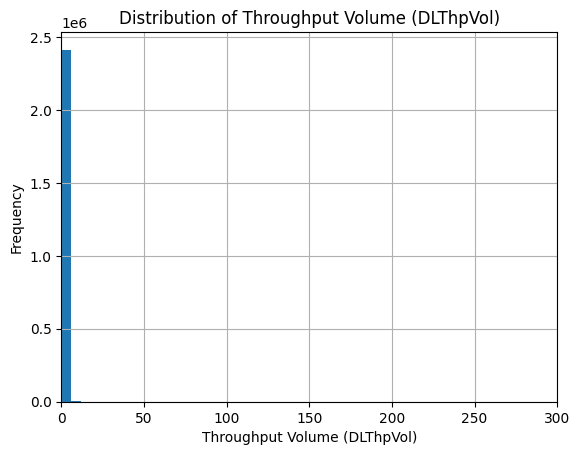

In [ ]:
import matplotlib.pyplot as plt

# Create the histogram with the specified range (0 to 300)
transformed_dlthtpvol['Target'].hist(bins=50, range=(0, 300))

# Set the x-axis limit to focus between 0 and 300
plt.xlim(0, 300)

# Add labels and title for clarity
plt.xlabel('Throughput Volume (DLThpVol)')
plt.ylabel('Frequency')
plt.title('Distribution of Throughput Volume (DLThpVol)')



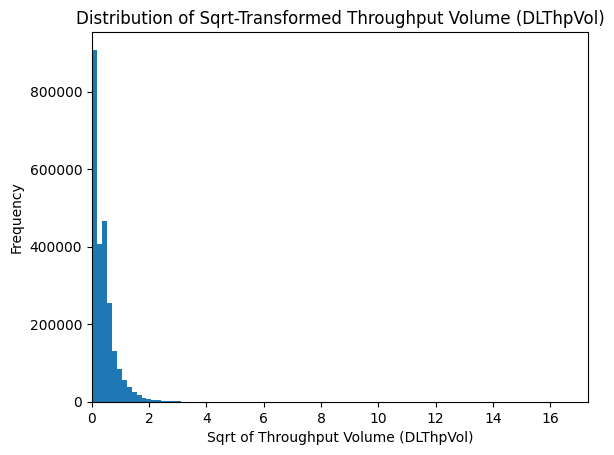

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Apply square root transformation to the 'Target' column
transformed_sqrt = np.sqrt(transformed_dlthtpvol['Target'])

# Create a histogram for the sqrt-transformed values
plt.hist(transformed_sqrt, bins=100, range=(0, np.sqrt(300)))

# Set the x-axis limit to match the transformed range
plt.xlim(0, np.sqrt(300))

# Add labels and title for clarity
plt.xlabel('Sqrt of Throughput Volume (DLThpVol)')
plt.ylabel('Frequency')
plt.title('Distribution of Sqrt-Transformed Throughput Volume (DLThpVol)')

# Display the plot
plt.show()


### Hourly traffic Volume Trends

<Axes: xlabel='hr'>

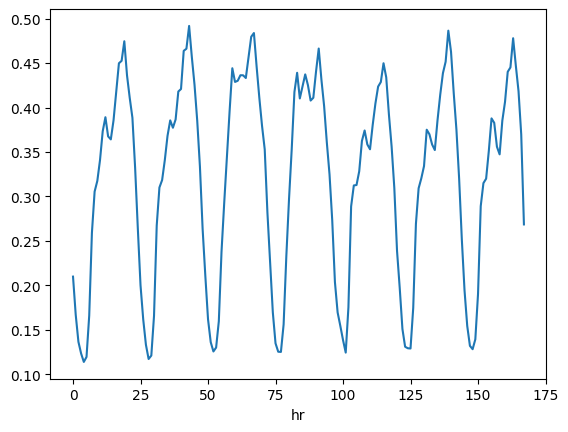

In [ ]:
transformed_dlthtpvol.groupby('hr')['Target'].mean().plot(kind='line')

### Weekly Traffic Volume Trends

<Axes: xlabel='week'>

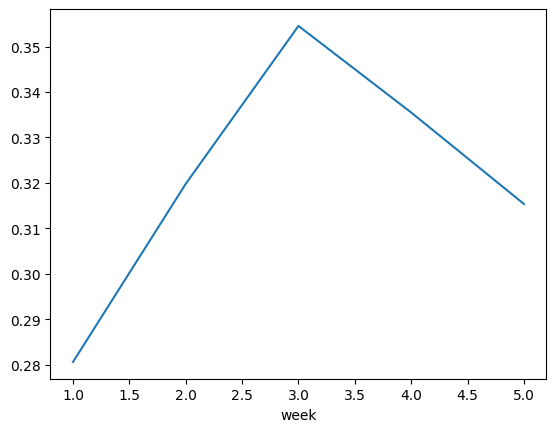

In [ ]:
transformed_dlthtpvol.groupby('week')['Target'].mean().plot(kind='line')


### Beam Level Traffic Volume HeatMap

Text(0.5, 1.0, 'Heatmap of Beam-Level Traffic Volume')

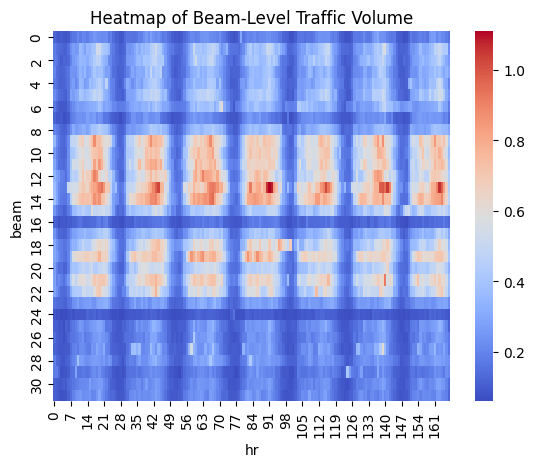

In [ ]:

beam_pivot = transformed_dlthtpvol.pivot_table(values='Target', index='beam', columns='hr', aggfunc='mean')
sns.heatmap(beam_pivot, cmap='coolwarm')
plt.title('Heatmap of Beam-Level Traffic Volume')


### PRB Utilization vs Traffic Volume

Text(0.5, 1.0, 'PRB Utilization vs Traffic Volume')

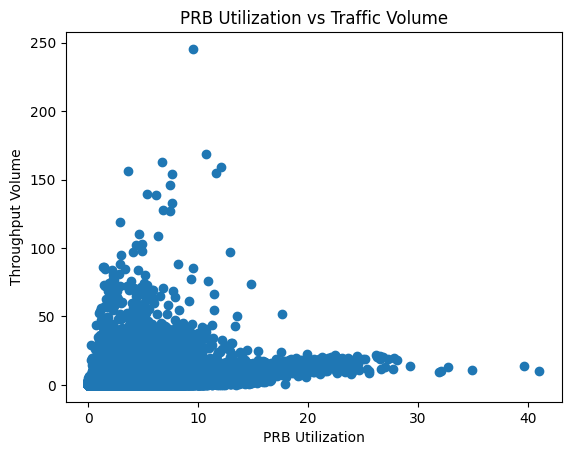

In [ ]:
plt.scatter(transformed_dlprb['Target'], transformed_dlthtpvol['Target'])
plt.xlabel('PRB Utilization')
plt.ylabel('Throughput Volume')
plt.title('PRB Utilization vs Traffic Volume')


### Throughput volume bs PRB Utilization

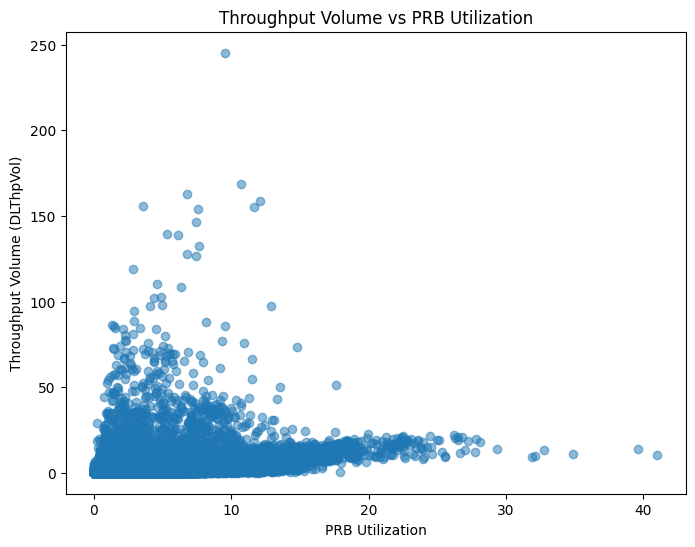

In [ ]:
# Scatter plot for Throughput Volume vs PRB Utilization
plt.figure(figsize=(8, 6))
plt.scatter(transformed_dlprb['Target'], transformed_dlthtpvol['Target'], alpha=0.5)

# Add labels and title
plt.xlabel('PRB Utilization')
plt.ylabel('Throughput Volume (DLThpVol)')
plt.title('Throughput Volume vs PRB Utilization')
plt.show()


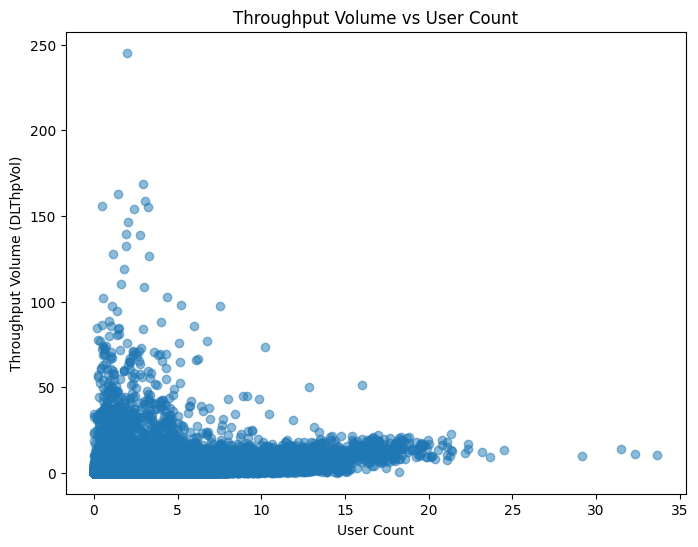

In [ ]:
# Scatter plot for Throughput Volume vs User Count
plt.figure(figsize=(8, 6))
plt.scatter(transformed_mrnumber['Target'], transformed_dlthtpvol['Target'], alpha=0.5)

# Add labels and title
plt.xlabel('User Count')
plt.ylabel('Throughput Volume (DLThpVol)')
plt.title('Throughput Volume vs User Count')
plt.show()


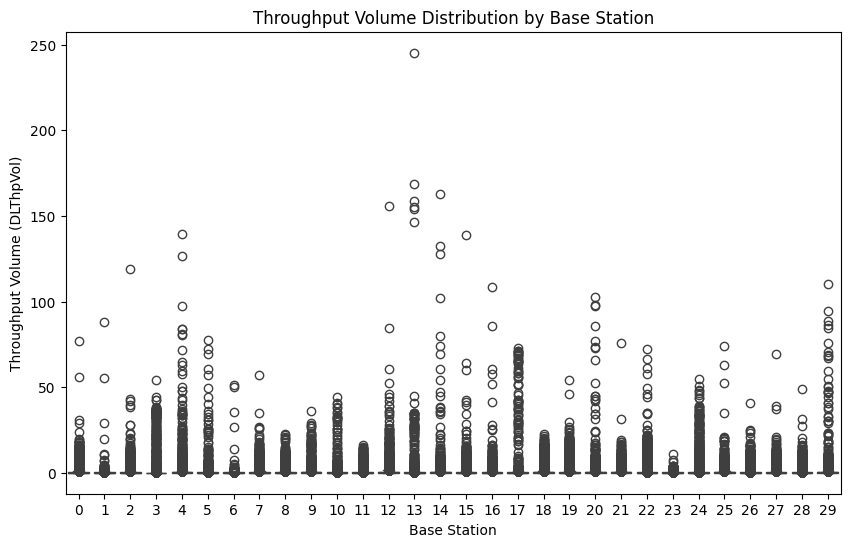

In [ ]:
# Boxplot for throughput volume by base station
plt.figure(figsize=(10, 6))
sns.boxplot(x='base_station', y='Target', data=transformed_dlthtpvol)

# Add labels and title
plt.xlabel('Base Station')
plt.ylabel('Throughput Volume (DLThpVol)')
plt.title('Throughput Volume Distribution by Base Station')
plt.show()
